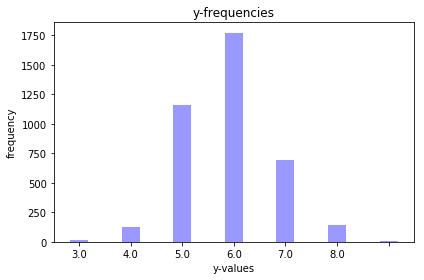

Mean squared error for training data (simple predictor) =  0.7767772386501273
Mean squared error for test data (simple predictor) =  0.8138573000045545
Mean squared error for training data (linear predictor) =  0.5639996173942025
Mean squared error for test data (linear predictor) =  0.5607292068714265
[2.52110294 1.047805   0.75014328 0.64711719 0.62380193 0.62265375
 0.60394102 0.59347511 0.58767081 0.58026419 0.57579764 0.58373866
 0.57757232 0.56911739 0.56810639 0.5709148  0.57038889 0.56769223
 0.56625872 0.56627174 0.56656629 0.56420703 0.5646946  0.56091903
 0.56101898 0.56176206 0.56253577 0.56220853 0.56305215 0.5646306 ]
[0.31537177 0.56982283 0.53909119 0.49022631 0.56327099 0.54317797
 0.57227396 0.56128541 0.5464631  0.53263232 0.53905603 0.59622609
 0.60154303 0.59216926 0.57414077 0.55904847 0.56540704 0.55198847
 0.54129849 0.52896093 0.52247071 0.52289619 0.52250431 0.55163728
 0.5544105  0.5587186  0.55418193 0.5501282  0.55072958 0.56875871]


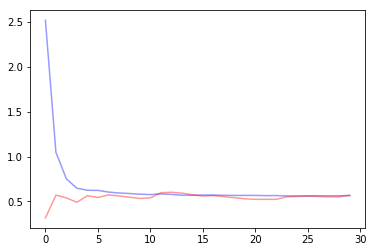

In [25]:
import _pickle as cp
import numpy as np
X, y = cp.load(open('winequality-white.pickle', 'rb'))

N, D = X.shape
N_train = int(0.8 * N)
N_test = N - N_train
X_train = X[:N_train]
y_train = y[:N_train]
X_test = X[N_train:]
y_test = y[N_train:]

#produce frequency graph
yp = list(y_train)
#cheaty way to remove duplicates
ynodl = list(set(y_train))
ynodl.sort()

frequencies = np.array(list(map(lambda x: yp.count(x),ynodl)))


import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

n_groups = len(ynodl)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4

rects1 = ax.bar(index, frequencies, bar_width, alpha=opacity, color='b')

ax.set_xlabel('y-values')
ax.set_ylabel('frequency')
ax.set_title('y-frequencies')
ax.set_xticklabels(np.array(ynodl)-1)

fig.tight_layout()
plt.show()


#calculate mean squared error
mean = sum(list(y_train))/len(y_train)
#variance is same as msr for the simple predictor!
variance = sum(list(map(lambda x: x ** 2,list(y_train))))/len(y_train) - mean ** 2
squareResidualstest = list(map(lambda x: (x-mean) ** 2, list(y_test)))
msrtest = sum(squareResidualstest)/len(squareResidualstest)
squareResidualstrain = list(map(lambda x: (x-mean) ** 2, list(y_train)))
msrtrain = sum(squareResidualstrain)/len(squareResidualstrain)
print("Mean squared error for training data (simple predictor) = ", msrtrain)
print("Mean squared error for test data (simple predictor) = ", msrtest)

stndrdtrain2 = list(map(lambda x: (x-mean)/np.sqrt(variance), list(X_train)))
stndrdtest2 = list(map(lambda x: (x-mean)/np.sqrt(variance), list(X_test)))

stndrdtrain = np.c_[np.ones(len(stndrdtrain2)),stndrdtrain2]
stndrdtest = np.c_[np.ones(len(stndrdtest2)),stndrdtest2]

w = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(stndrdtrain),stndrdtrain)),np.transpose(stndrdtrain)),y_train)
yhattrain = np.matmul(stndrdtrain,w)
yhattest = np.matmul(stndrdtest,w)

squareResidualstrain2 = list(map(lambda x: x ** 2, list(y_train-yhattrain)))
msrtrain2 = sum(squareResidualstrain2)/len(squareResidualstrain2)
print("Mean squared error for training data (linear predictor) = ", msrtrain2)

squareResidualstest2 = list(map(lambda x: x ** 2, list(y_test-yhattest)))
msrtest2 = sum(squareResidualstest2)/len(squareResidualstest2)
print("Mean squared error for test data (linear predictor) = ", msrtest2)

#entries are error for 20,40,60,...,600 datapoints
dpno = np.array(list(map(lambda x: x * 20,list(range(1,31)))))
msrarraytest = np.array(list(map(lambda x: sum(list(map(lambda z: z ** 2, list(y_test-np.matmul(stndrdtest,np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(stndrdtrain[0:x]),stndrdtrain[0:x])),np.transpose(stndrdtrain[0:x])),y_train[0:x]))))))/len(list(map(lambda x: x ** 2, list(y_test-np.matmul(stndrdtest,np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(stndrdtrain[0:x]),stndrdtrain[0:x])),np.transpose(stndrdtrain[0:x])),y_train[0:x])))))),dpno)))
msrarraytrain = np.array(list(map(lambda x: sum(list(map(lambda z: z ** 2, list(y_train[0:x]-np.matmul(stndrdtrain[0:x],np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(stndrdtrain[0:x]),stndrdtrain[0:x])),np.transpose(stndrdtrain[0:x])),y_train[0:x]))))))/len(list(map(lambda x: x ** 2, list(y_train[0:x]-np.matmul(stndrdtrain[0:x],np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(stndrdtrain[0:x]),stndrdtrain[0:x])),np.transpose(stndrdtrain[0:x])),y_train[0:x])))))),dpno)))

print(msrarraytest)
print(msrarraytrain)

n_groups = len(dpno)

fig, ax = plt.subplots()

index = np.arange(n_groups)
opacity = 0.4

#error for test data
ax.plot(index, msrarraytest, alpha=opacity, color='b')
ax.plot(index, msrarraytrain, alpha=opacity, color='r')

